# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Цель исследования:

1. Определить рыночную стоимость объектов недвижимости
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность
3. установить, какие факторы влияют на ценообразование стоимости квартир

## Ход исследования 

1. обзор данных
2. предобработка данных
3. расчеты и добавления результатов в таблицу
4. проведение анализа 
6. определение факторов. вляющих на цену
7. общий вывод

### обзор данных 

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00   

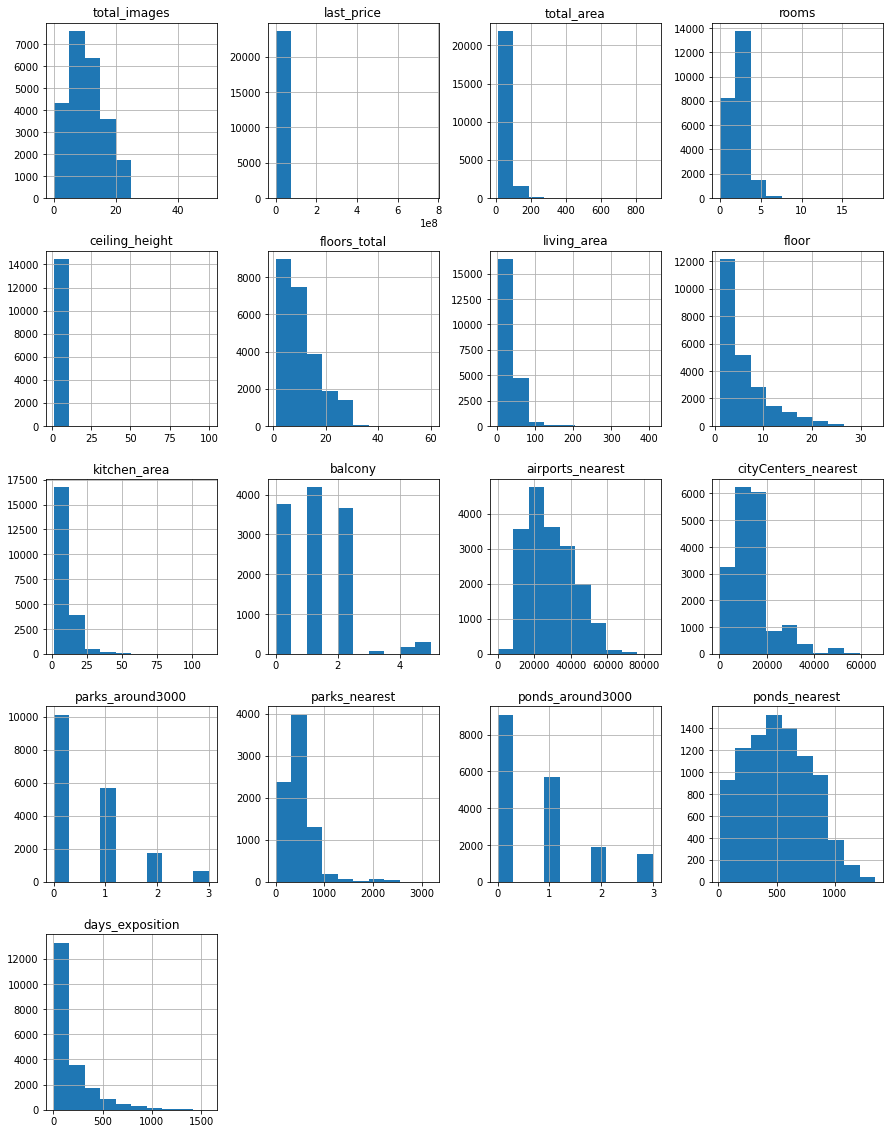

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

print(data.head(20))
data.info()
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

#### работа с пропусами 

In [2]:
#изучение пропущенных значений 

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [3]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [3]:
#поиск явных дубликатов
data.duplicated().sum()


0

In [4]:
#заполняем кол-во балконов 

data['balcony'] = data['balcony'].fillna(0)


#вместо пропусков в высоте потолков ставим стреднее значение, т.к. не было найдено сильной корреляции между высотой потолков и другими данными 
data['ceiling_height']= data['ceiling_height'].fillna(data['ceiling_height'].mean())



data.head(6)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.771499,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.771499,12.0,14.4,5,NaN,...,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


пропуски были заполнены в двух столбцах: `balcony` и `ceiling_height`.
`balcony` - если продавец не указал число балконов, то, скорее всего, в его квартире их нет.
`ceiling_height` - высота потолков не сильно отличаеся, максимальаня разница около50 см, поэтому было принято решение заполнить пропуски средним значением.

некоторые пропуски пропуски могли появится от недостатка информации у продавцов (нап. столбцы `airports_nearest`,`parks_nearest`,`ponds_around3000`,`ponds_nearest`)

пропуски в стобце `is_apartment` скорее всего являются значением 0 или нет.


In [5]:
#меняем все пропуски на 0
data['is_apartment'] = data['is_apartment'].fillna(0)
#меняем тип столбца 
data['is_apartment'].astype('bool')
data['is_apartment'].unique()

array([0, True], dtype=object)

все пропуски в столбце `is_apartment` были заменены 0, что при переводе этого столбца к типу `bool` будет считывать как `False`


In [6]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок ','')
data['locality_name'] = data['locality_name'].str.replace('городской ','')



In [7]:
def height(row):
    if row < 10.5:
        return row
    else: 
        return row /10.
        
data.loc[data['ceiling_height']>10.5, 'ceiling_height'] = data['ceiling_height'].apply(height)


data['ceiling_height'].sort_values().unique()

array([ 1.       ,  1.2      ,  1.4      ,  1.75     ,  2.       ,
        2.2      ,  2.25     ,  2.26     ,  2.3      ,  2.34     ,
        2.4      ,  2.45     ,  2.46     ,  2.47     ,  2.48     ,
        2.49     ,  2.5      ,  2.51     ,  2.52     ,  2.53     ,
        2.54     ,  2.55     ,  2.56     ,  2.57     ,  2.58     ,
        2.59     ,  2.6      ,  2.61     ,  2.62     ,  2.63     ,
        2.64     ,  2.65     ,  2.66     ,  2.67     ,  2.68     ,
        2.69     ,  2.7      ,  2.71     ,  2.72     ,  2.73     ,
        2.74     ,  2.75     ,  2.76     ,  2.77     ,  2.7714989,
        2.78     ,  2.79     ,  2.8      ,  2.81     ,  2.82     ,
        2.83     ,  2.84     ,  2.85     ,  2.86     ,  2.87     ,
        2.88     ,  2.89     ,  2.9      ,  2.91     ,  2.92     ,
        2.93     ,  2.94     ,  2.95     ,  2.96     ,  2.97     ,
        2.98     ,  2.99     ,  3.       ,  3.01     ,  3.02     ,
        3.03     ,  3.04     ,  3.05     ,  3.06     ,  3.07  

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### обработка выборосов 

In [9]:
#очищаем от редких значений. а именно от квартир с комнатами больше 7

data['rooms'] = data.loc[data['rooms'] < 8, 'rooms']

data['rooms'].value_counts()

1.0    8047
2.0    7940
3.0    5814
4.0    1180
5.0     326
0.0     197
6.0     105
7.0      59
Name: rooms, dtype: int64

In [10]:
#очищаем от редких значений. а именно от квартир с этажем больше 24

data['floor'] = data.loc[data['floor'] < 25, 'floor']
data['floor'].value_counts()

2.0     3368
3.0     3073
1.0     2917
4.0     2804
5.0     2621
6.0     1305
7.0     1218
8.0     1083
9.0     1051
10.0     687
12.0     526
11.0     523
13.0     379
15.0     343
14.0     337
16.0     315
17.0     227
18.0     178
19.0     147
21.0     125
22.0     113
20.0     110
23.0     100
24.0      63
Name: floor, dtype: int64

In [11]:
data['total_area'].value_counts()


45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

В предобработке данных были выявленны следующие особенности и исправлены некоторые проблемные места, а именно:
- была проведена проверка ну дубликаты 

- были найдены пропуски в 14 столбах (однако не все они могут быть заполнены)

- пропуски были заполнены в двух столбцах: `balcony` и `ceiling_height`.
`balcony` - если продавец не указал число балконов, то, скорее всего, в его квартире их нет.
`ceiling_height` - высота потолков не сильно отличаеся, максимальаня разница около50 см, поэтому было принято решение заполнить пропуски средним значением.

- были исправлены дублирующиеся названия населенных пунктов

- данные были очищены от редких значений в столбцах `floor` и `rooms`

Остальные пропуски (например в столбцах `airports_nearest`,`cityCenters_nearest`) не могут быть заполнены, но и не искажают данные



### расчеты и добавления результатов в таблицу

In [12]:
#цена одного квадратного метра
data['price_one_meter'] = data['last_price']/data['total_area']



In [13]:
#день недели
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'] = data['weekday'].where(data['weekday'] != 0, 'понедельник')
data['weekday'] = data['weekday'].where(data['weekday'] != 1, 'вторник')
data['weekday'] = data['weekday'].where(data['weekday'] != 2, 'среда')
data['weekday'] = data['weekday'].where(data['weekday'] != 3, 'четверг')
data['weekday'] = data['weekday'].where(data['weekday'] != 4, 'пятница')
data['weekday'] = data['weekday'].where(data['weekday'] != 5, 'суббота')
data['weekday'] = data['weekday'].where(data['weekday'] != 6, 'воскресенье')

(data['weekday']) 

0            четверг
1            вторник
2            четверг
3            пятница
4            вторник
            ...     
23694        вторник
23695    понедельник
23696    воскресенье
23697        вторник
23698        пятница
Name: weekday, Length: 23699, dtype: object

In [14]:
#месяц
data['month'] = data['first_day_exposition'].dt.month

data['month'] = data['month'].where(data['month'] != 1, 'январь')
data['month'] = data['month'].where(data['month'] != 2, 'февраль')
data['month'] = data['month'].where(data['month'] != 3, 'март')
data['month'] = data['month'].where(data['month'] != 4, 'апрель')
data['month'] = data['month'].where(data['month'] != 5, 'май')
data['month'] = data['month'].where(data['month'] != 6, 'июнь')
data['month'] = data['month'].where(data['month'] != 7, 'июль')
data['month'] = data['month'].where(data['month'] != 8, 'август')
data['month'] = data['month'].where(data['month'] != 9, 'сентябрь')
data['month'] = data['month'].where(data['month'] != 10, 'октябрь')
data['month'] = data['month'].where(data['month'] != 11, 'ноябрь')
data['month'] = data['month'].where(data['month'] != 12, 'декабрь')


data['month']

0           март
1        декабрь
2         август
3           июль
4           июнь
          ...   
23694       март
23695     январь
23696    февраль
23697       март
23698       июль
Name: month, Length: 23699, dtype: object

In [15]:
#год

data['year'] = data['first_day_exposition'].dt.year

data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23699, dtype: int64

In [16]:
#тип этажа

def floor_type(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другое'


data['floor_type'] = data.apply(floor_type, axis = 1)
data['floor_type']

0        другое
1        первый
2        другое
3        другое
4        другое
          ...  
23694    другое
23695    другое
23696    первый
23697    другое
23698    первый
Name: floor_type, Length: 23699, dtype: object

In [17]:
#расстояние в км
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000



data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

data['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 23699, dtype: float64

### Проведение исследовательского анализа данных

<AxesSubplot:>

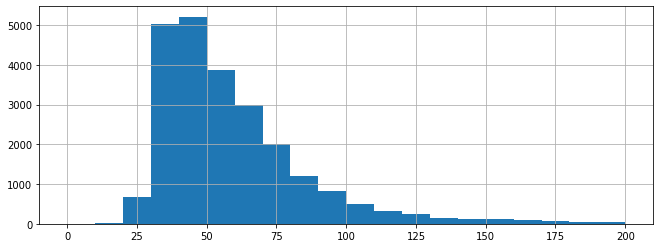

In [18]:
#общая площадь квартиры

data['total_area'].hist(bins=20, range=(0, 200),figsize=( 11 , 4 ))


по графику видно, что большинсво квартир имеют площадь от 35 до 60кв.м.

<AxesSubplot:>

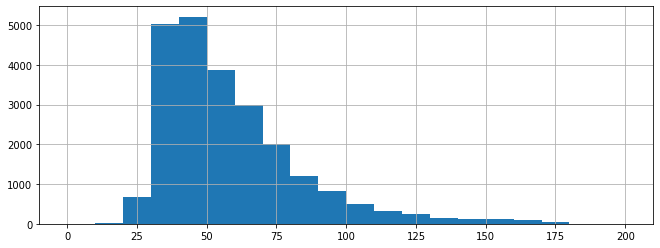

In [19]:
data['total_area'] = data.loc[data['total_area'] < 175, 'total_area']

data['total_area'].hist(bins=20, range=(0, 200),figsize=( 11 , 4 ))

по предыдущему графику было видно, что квартиры имеющие 175 кв.м. общей площади и больше, являются очень редкими, поэтому мы от них избавились


<AxesSubplot:>

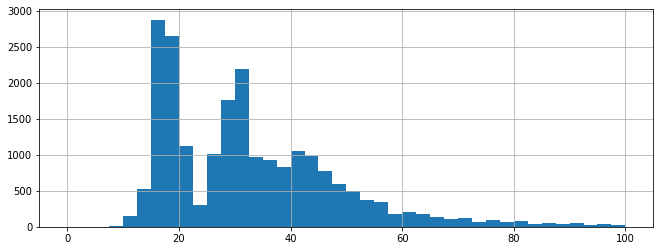

In [20]:
#жилая площадь

data['living_area'] = data.loc[data['living_area'] < 100, 'living_area']

data['living_area'].hist(bins=40, range=(0, 100),figsize=( 11 , 4 ))

жилая площадь имеет несколько пиков: в районе 15кв.м.и 30 кв.м.
    так же стоит сказать, что все квартиры, имеющие 100кв.м. и более являются очень редкими - мы их удалили

<AxesSubplot:>

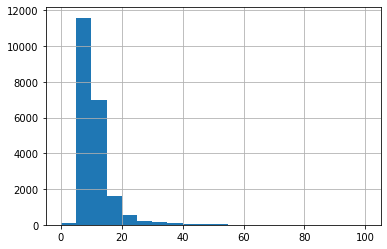

In [21]:
#площадь кухни
data['kitchen_area'].hist(bins=20, range=(0, 100))

<AxesSubplot:>

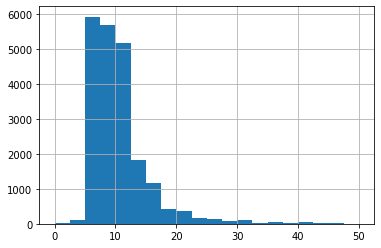

In [22]:
data['kitchen_area'] = data.loc[data['kitchen_area'] < 50, 'kitchen_area']
data['kitchen_area'].hist(bins=20, range=(0, 50))

по первому графику заметно, что квартиры, имеющие площадь кухни более 50кв.м - редкие значения. они были удалены

<AxesSubplot:>

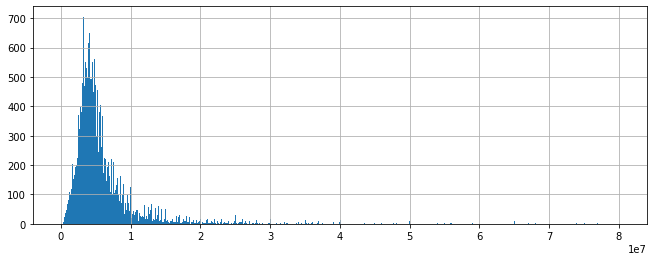

In [23]:
#цена объекта
data['last_price'].hist(bins=700, range = (0,80000000),figsize=( 11 , 4 ))

<AxesSubplot:>

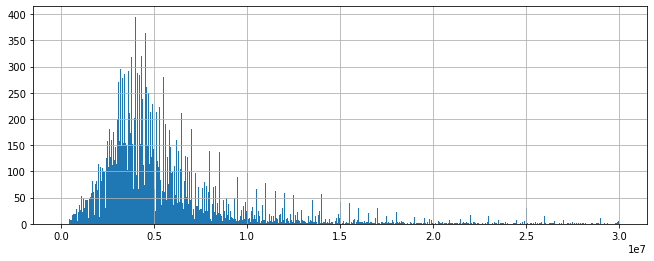

In [24]:
data['last_price'] = data.loc[data['last_price'] < 30000000, 'last_price']
data['last_price'].hist(bins=700, range = (0,30000000),figsize=( 11 , 4 ))

- квартиры, имеющие цену более чем 30 000 000, являются редкими, в то время как могут очень сильно испортить данные, т.к. имеют большую стоимость
мы их удалили
- основная прослойка квартир находится в ценовой рамке от 2000 000 до 7000 000

<AxesSubplot:>

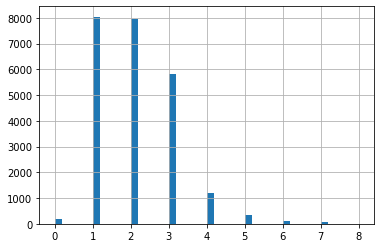

In [25]:
#количество комнат
data['rooms'].hist(bins=40, range=(0, 8))


1, 2, 3-х комнатные квартиры встречаються чаще всего, но не сильно разняться между собой в цифрах

<AxesSubplot:>

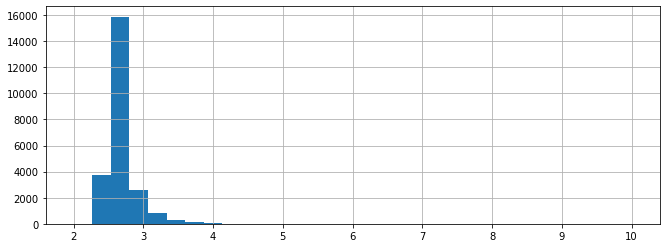

In [26]:
#высота потолков
data['ceiling_height'].hist(bins=30, range=(2, 10),figsize=( 11 , 4 ))

<AxesSubplot:>

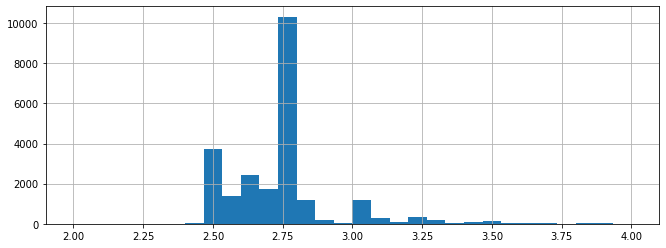

In [27]:
data['ceiling_height'] = data.loc[data['ceiling_height'] < 4, 'ceiling_height']
data['ceiling_height'].hist(bins=30, range=(2, 4),figsize=( 11 , 4 ))

<AxesSubplot:>

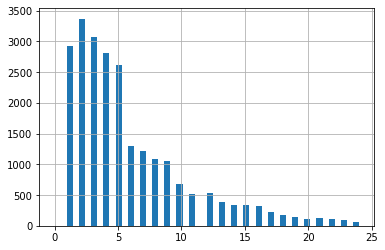

In [28]:
#этаж квартиры
data['floor'].hist(bins=50, range=(0, 24))

большинство квартир находятся в основном с 1 по 5 этаж (что может говорить о конкретной этажности домов)

<AxesSubplot:>

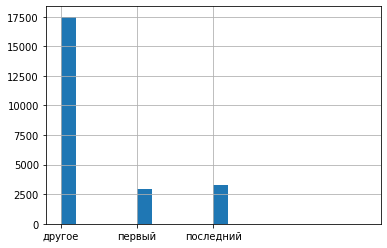

In [29]:
#тип этажа квартиры 
data['floor_type'].hist(bins=20, range=(0, 4))

<AxesSubplot:>

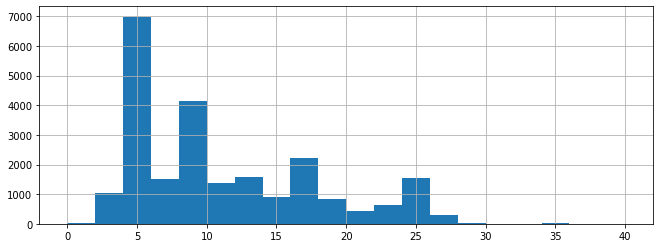

In [30]:
#общее количество этажей в доме
data['floors_total'].hist(bins=20, range=(0, 40),figsize=( 11 , 4 ))

как и говорилось ранее, чаще всего в данных представлены дома 5 этажные, далее по количествку идет 9-ти этажные дома

<AxesSubplot:>

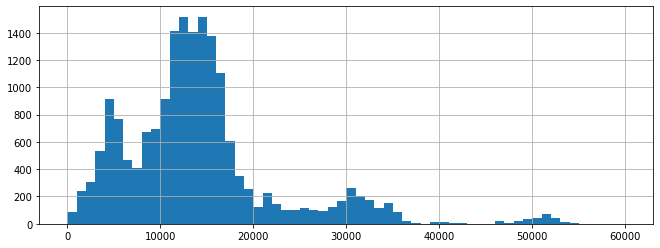

In [31]:
#расстояние до центра города в метрах
data['cityCenters_nearest'].hist(bins=60, range=(0, 60000),figsize=( 11 , 4 ))

основное расстояние от центра является 10 км, однако по графику видно еще пару пиков - это 30 км и 50км. скорее всего там находятся населеные пункты

<AxesSubplot:>

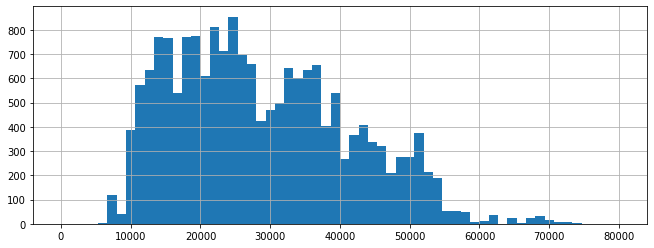

In [32]:
#расстояние до ближайшего аэропорта
data['airports_nearest'].hist(bins=60, range=(0, 80000),figsize=( 11 , 4 ))

<AxesSubplot:>

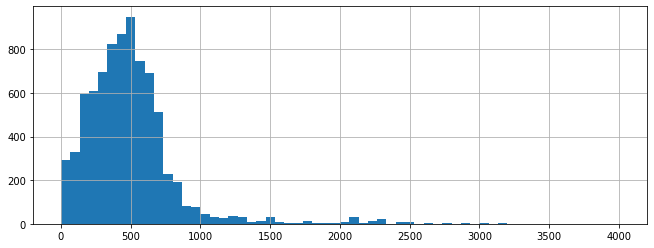

In [33]:
#расстояние до ближайшего парка
data['parks_nearest'].hist(bins=60, range=(0, 4000),figsize=( 11 , 4 ))

500 метров - самое оптимальное (часто встречающееся) расстояние от квартиры до парка 

<AxesSubplot:>

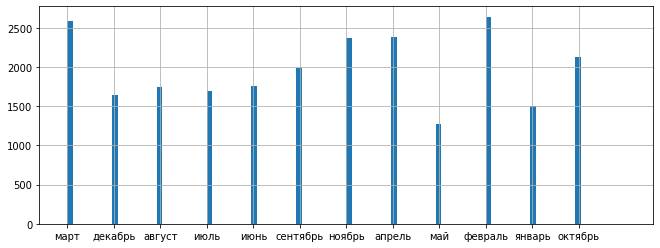

In [34]:
# месяц публикации объявления
data['month'].hist(bins=100, range=(0, 12), figsize=( 11 , 4 ))

по графику мы можем заметить, что февраль и март являются месяцами с самым большим количеством публикаций объявлений. а к лету объявления уже падают

<AxesSubplot:>

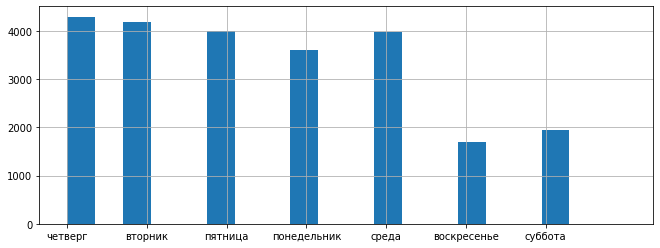

In [35]:
#день публикации объявления
data['weekday'].hist(bins=20, range=(0, 7), figsize=( 11 , 4 ))

выходные - самыер редкие дни, когда люди публикуют объявления о продаже квартиры

<AxesSubplot:>

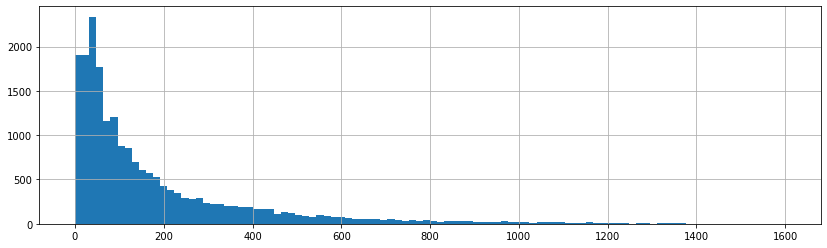

In [36]:
#days_exposition
data['days_exposition'].hist(bins=100, range=(0, 1600), figsize=( 14 , 4 ))

In [37]:
print('среднее количество дней до снятия объявления -',data['days_exposition'].mean())

среднее количество дней до снятия объявления - 180.88863436982163


In [38]:
print('медиана количества дней до снятия объявления -',data['days_exposition'].median())

медиана количества дней до снятия объявления - 95.0


In [39]:
data['days_exposition'].value_counts().head(20)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
8.0     139
20.0    139
44.0    138
11.0    135
18.0    129
13.0    128
10.0    127
28.0    126
15.0    126
22.0    125
Name: days_exposition, dtype: int64

- Среднее количесво дней до снятия объявления - `180`, однако медианное значение - `95`
- Самый часто встречающийся период продажи - `45 дней`
- Нельзя сказать, что продажи квартир РАНЬШЕ 45 дней - это редкие продажи, большая часть объявлений существует как раз не более 45 дней
- Те объявления, что висят более 100 дней, уже можно называть `долгими`, а те, что висят `более 600 дней - необычно долгими`.

### определение факторов, влияющих на цену

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

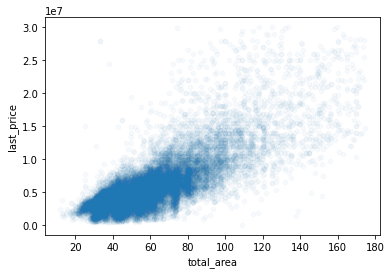

In [40]:
#график взаимосвязи общей цены квартиры и общей площади 
data.plot(x='total_area', y='last_price',kind='scatter', alpha=0.03, style='o-')

In [41]:
#ищем корреляцию
data['total_area'].corr(data['last_price'])


0.778996297839145

По графику и `коэффициенту корреляции, равному 0.77`, можно сказать, что площадь `НАПРЯМУЮ ВЛИЯЕТ` на СТОИМОСТЬ КВАРТИРЫ 
- ЧЕМ БОЛЬШЕ ПЛОЩАДЬ КВАРТИРЫ, ТЕМ БОЛЬШЕ ЕЁ СТОИМОСТЬ


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

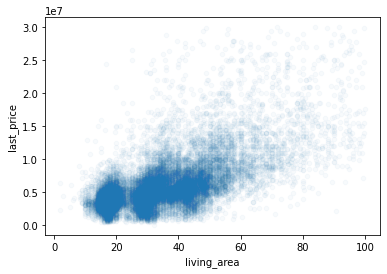

In [42]:
#график взаимосвязи общей цены квартиры и жилой площади 

data.plot(x='living_area', y='last_price',kind='scatter', alpha=0.03, style='o-')

In [43]:
data['living_area'].corr(data['last_price'])

0.6504177276165791

По графику и `коэффициенту корреляции, равному 0.65`, можно сказать, что жилая площадь `ВЛИЯЕТ` на СТОИМОСТЬ КВАРТИРЫ, однако в меньшей степени, чем общая площадь  


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

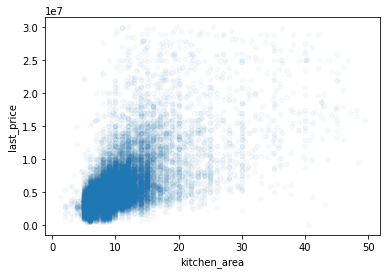

In [44]:
#график взаимосвязи общей цены квартиры и  площади кухни

data.plot(x='kitchen_area', y='last_price',kind='scatter', alpha=0.03, style='o-')

In [45]:
data['kitchen_area'].corr(data['last_price'])

0.6073548479946655

По графику и коэффициенту корреляции, равному 0.6, можно сказать, что площадь кухни так-же ВЛИЯЕТ на СТОИМОСТЬ КВАРТИРЫ, однако в меньшей степени, чем общая площадь и жилая площадь

<AxesSubplot:xlabel='rooms'>

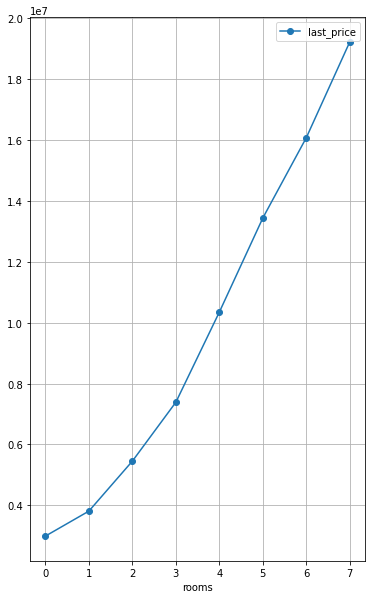

In [46]:
#график взаимосвязи общей своимости квартиры и количества комнат 
(data
    .pivot_table(index='rooms', values='last_price')
    .plot( style='o-',figsize=(6, 10),grid = True)
)    


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

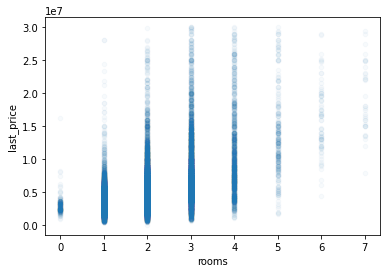

In [47]:
data.plot(x='rooms', y='last_price',kind='scatter', alpha=0.03, style='o-')

In [48]:
data['rooms'].corr(data['last_price'])

0.5136244960605002

По графикам и коэффициенту корреляции, равному 0.51, можно сказать, что число комнат  ВЛИЯЕТ на СТОИМОСТЬ КВАРТИРЫ, однако в данном случае все интереснее:
- если мы берем квартиры с 1-3 комнатами, то их стоимость не так сильно варируется между собой.
- начиная с 4 комнат и выше стоимость резко возрастает

<AxesSubplot:xlabel='floor_type'>

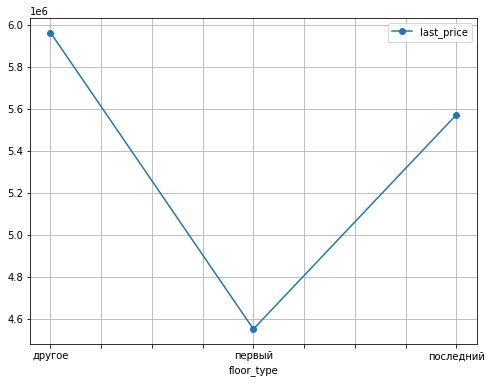

In [49]:
#график взаимосвязи общей своимости квартиры и типом этажа

(data
    .pivot_table(index='floor_type', values='last_price')
    .plot( style='o-',figsize=(8, 6),grid = True)
)    

По графикам  можно сказать, что тип этажа  ВЛИЯЕТ на СТОИМОСТЬ КВАРТИРЫ:
- песледние этажы ценятся чуть меньше, чем этажи по середине
- первые этажи имеют самую дешевую стоимость


<AxesSubplot:xlabel='month'>

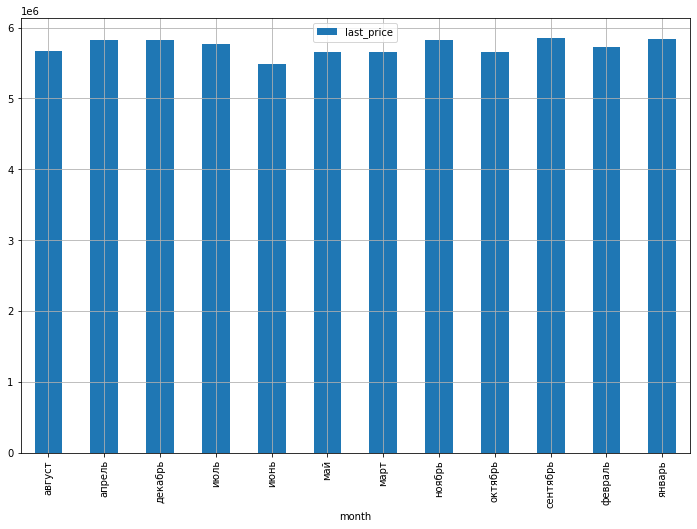

In [50]:


(data
    .pivot_table(index='month', values='last_price')
    .plot.bar( style='o-',figsize=(12, 8),grid = True)
)  

<AxesSubplot:xlabel='weekday'>

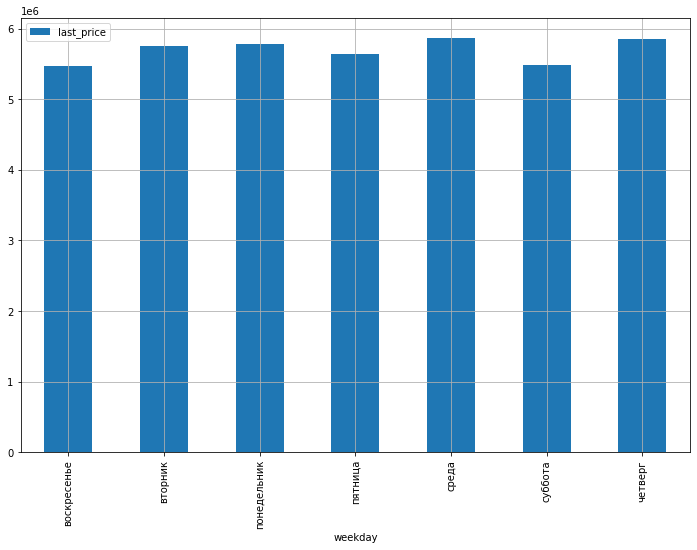

In [51]:
(data
    .pivot_table(index='weekday', values='last_price')
    .plot.bar( style='o-',figsize=(12, 8),grid = True)
)  

<AxesSubplot:xlabel='year'>

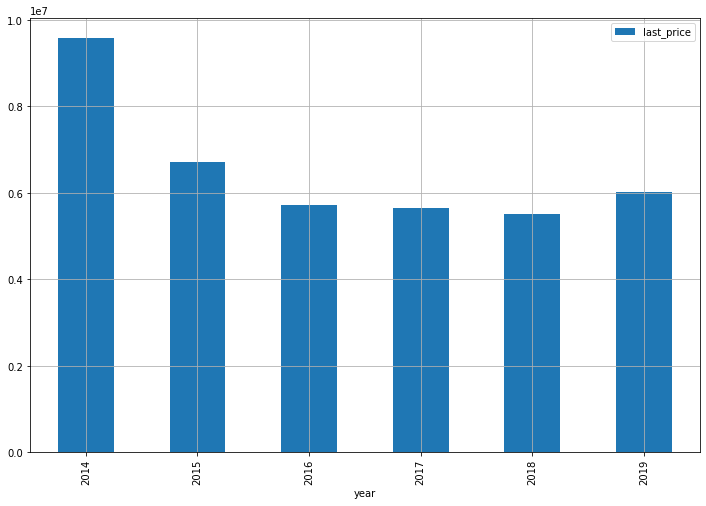

In [52]:
(data
    .pivot_table(index='year', values='last_price')
    .plot.bar( style='o-',figsize=(12, 8),grid = True)
)  

In [53]:
#создаем список топ 10 населеных пунктов по числу объявлений
top_name = data['locality_name'].value_counts().head(10)
#print(top_name)
#создаем список средней стоимости квадрата по населеным пунктам
price_one_meter_name = data.pivot_table(index='locality_name', values= 'price_one_meter', aggfunc='mean')
#print(price_one_meter_name)


#ищем среди списка "средней стоимости квадрата по населеным пунктам" те населеные пункты, входящие в топ 10 по числу объявлений
price_one_meter_top_name = price_one_meter_name.query('locality_name in @top_name.index')

#сортируем список
price_one_meter_top_name.sort_values(by = 'price_one_meter')

,price_one_meter
locality_name,
выборг,58141.909153
всеволожск,68654.473986
гатчина,68746.146763
колпино,75424.579098
шушары,78677.364217
мурино,86087.512050
парголово,90175.913458
деревня кудрово,92473.547576
пушкин,103125.819291


Согласно списку `price_one_meter_top_name`:
- `САНКТ - ПЕТЕРБУРГ`- город с самым дорогим средним квадратным метром, а именно -`111849р`
- `ВЫБОРГ` - город с самым низким по стоимости средним квадратным метром, а именно - `58141р`

In [54]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
санкт-петербург,15721,5493030.0
мурино,590,3400000.0
шушары,440,3950000.0
всеволожск,398,3450000.0
пушкин,369,5150000.0
колпино,338,3600000.0
парголово,327,4100000.0
гатчина,307,3100000.0
деревня кудрово,299,3790000.0


In [55]:
city_spb = data.query('locality_name == "санкт-петербург"')

city_spb.pivot_table(index = 'cityCenters_nearest_km', values='last_price', aggfunc='mean')


,last_price
cityCenters_nearest_km,
0.0,1.131867e+07
1.0,1.183008e+07
2.0,1.112824e+07
3.0,9.772281e+06
4.0,1.033412e+07
5.0,1.089508e+07
6.0,9.755564e+06
7.0,9.278996e+06
8.0,8.785690e+06


<AxesSubplot:title={'center':'Заголовок'}, xlabel='cityCenters_nearest_km'>

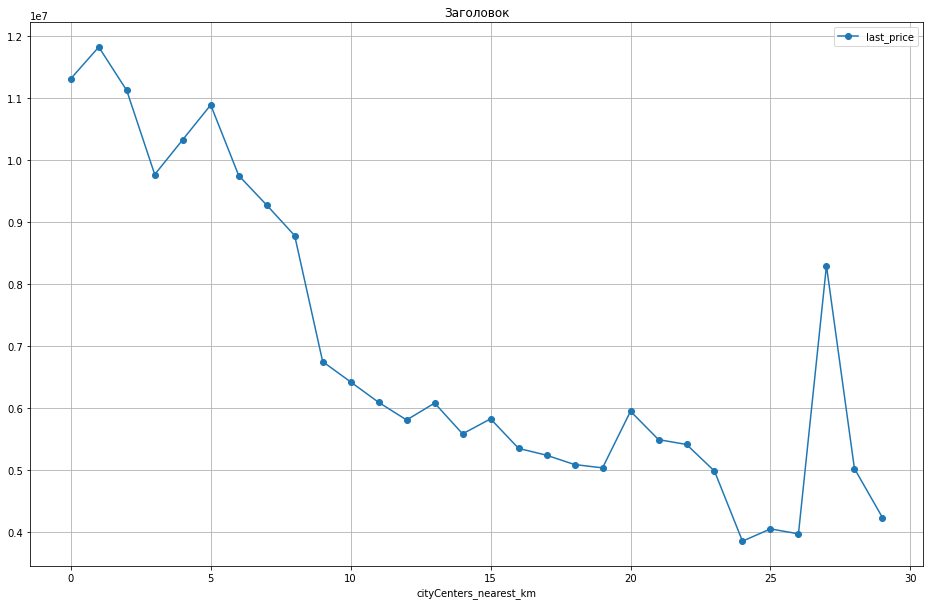

In [58]:
(city_spb
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
    .plot( style='o-',figsize=(16, 10),grid = True, title = 'Заголовок')
)    


- по графику видно, как снижается цена по мере отдаления квартиры от центра
- однако стоит заметить, что в 43км и 55км ценовые пики повышаються, что говорит о том, что скорее всего в населеных пунктах ( находящихся на этом расстоянии) присутсвуют элитные жилые районы

### Общий вывод

был произведен анализ данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

- По данным можно сообщить, что самыми базовыми квартирами являются `1, 2-х, 3-х` комнатные квартиры, находящиеся в ценовом диапозоне от `2 000 000 до 7 000 000`

- Общая площадь таких квартир варируется от `35 до 65 кв.м.`

- Подавляющее большинсво квартир находятся с `1 по 5 этажи` (чаще всего сами дома встречаються 5 этажные)

- чаще всего данные квартиры продается 45 дней (большая часть до 45 дней)

- `площадь квартиры`, `количество комнат`, `тип этажа` а так же `расстояние до центра города` - являються самыми `сильными` факторами, которые влияют на цену квартиры